In [1]:
import numpy as np
import configparser
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [2]:
config = configparser.ConfigParser()
config.read('../config/config-spyder.ini')

['../config/config-spyder.ini']

In [3]:
import sys
sys.path.insert(0, '../source/')
from Get_Train_Test_Data import GetTrainTestData

In [4]:
X_train, X_test, X_val, y_train, y_test, y_val = GetTrainTestData(config).read_dataset()
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')

In [5]:
from keras.models import model_from_json, Model

with open('../results/best-model/model.json') as f:
    config_model = f.read()
    
model = model_from_json(config_model)
model.load_weights('../results/best-model/weights.hdf5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

In [7]:
matrix = confusion_matrix(y_test, y_pred)

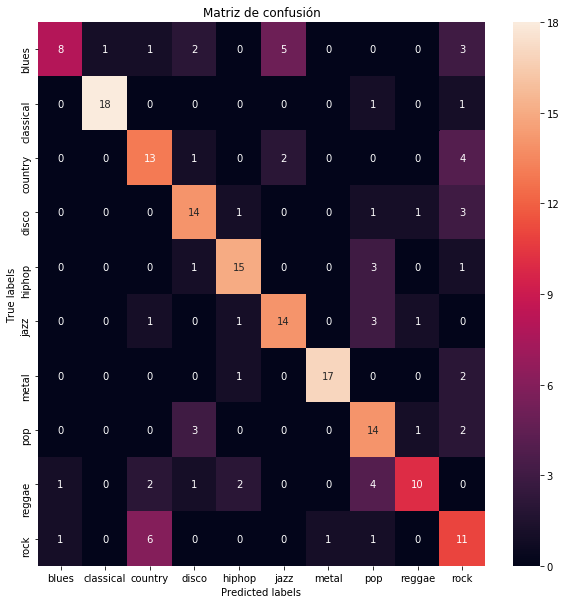

In [8]:
plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Matriz de confusión'); 
ax.xaxis.set_ticklabels(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']); 
ax.yaxis.set_ticklabels(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']);